# BITEhack 2023 - Data Cleaning

Dane z których korzystamy:
https://www.kaggle.com/datasets/kingburrito666/residential-energy-consumption-survey

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('./data/public_layout.csv')

Ilość urządzeń elektrycznych, id nas nie obchodzi, wszystko co się wiąże z zużyciem prądu

In [2]:
df = pd.read_csv('./data/recs2009_public.csv')

Wybór kolumn do dalszego przetwarzania

In [3]:
useful_columns = ['YEARMADE',
                   'TOTROOMS', 'CELLAR', 'ATTIC', 'PRKGPLC1', 'SIZEOFGARAGE',
                   'STOVEN', 'DISHWASH', 'TVCOLOR', "NUMPC", "EQUIPAUX", "TEMPNITE", "TEMPNITEAC", "HELPCFL", "NHSLDMEM", "ATHOME",
                   "TOTHSQFT", "TOTALBTU", 'INSTLCFL'
                   ]

In [4]:
df = df[useful_columns]

Zastąpienie temperatur w Farenheitach stopniami Celciusza

In [5]:
df['TEMPNITEAC_CELCIUS'] = df.apply(lambda _: '', axis=1)

In [6]:
df['TEMPNITE_CELCIUS'] = (df['TEMPNITE'] - 32) * (5/9)
df['TEMPNITEAC_CELCIUS'] = (df['TEMPNITEAC'] - 32) * (5/9)
df.drop(columns=['TEMPNITE', 'TEMPNITEAC'],axis=1, inplace=True)

In [7]:
df.head()

,YEARMADE,TOTROOMS,CELLAR,ATTIC,PRKGPLC1,SIZEOFGARAGE,STOVEN,DISHWASH,TVCOLOR,NUMPC,EQUIPAUX,HELPCFL,NHSLDMEM,ATHOME,TOTHSQFT,TOTALBTU,INSTLCFL,TEMPNITEAC_CELCIUS,TEMPNITE_CELCIUS
0,2004,9,1,0,1,2,1,1,4,2,0,0,4,0,3958,63006,1,22.777778,20.000000
1,1998,4,0,0,1,2,1,0,2,2,1,-2,6,1,2736,103460,-2,-18.888889,22.777778
2,1965,2,-2,-2,-2,-2,1,0,1,1,0,0,1,0,528,58716,1,-18.888889,18.333333
3,1985,7,0,0,1,2,0,1,5,2,0,-2,1,1,1623,76401,-2,20.000000,12.777778
4,1983,5,1,0,0,-2,1,1,2,2,0,0,1,0,1274,59809,1,-18.888889,21.111111


Usunięcie kłopotliwych -2

In [8]:
# Replacing tricki -2 values with 0 in selected columns
for col in ['CELLAR', 'ATTIC', 'PRKGPLC1', 'INSTLCFL']:
    for i in range(len(df)):
        if df.loc[i, col] == -2:
            df.loc[i, col] = 0

C:\Users\janek\AppData\Local\Temp\ipykernel_22100\4014895529.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


array([[<AxesSubplot:title={'center':'YEARMADE'}>,
        <AxesSubplot:title={'center':'TOTROOMS'}>,
        <AxesSubplot:title={'center':'CELLAR'}>,
        <AxesSubplot:title={'center':'ATTIC'}>],
       [<AxesSubplot:title={'center':'PRKGPLC1'}>,
        <AxesSubplot:title={'center':'SIZEOFGARAGE'}>,
        <AxesSubplot:title={'center':'STOVEN'}>,
        <AxesSubplot:title={'center':'DISHWASH'}>],
       [<AxesSubplot:title={'center':'TVCOLOR'}>,
        <AxesSubplot:title={'center':'NUMPC'}>,
        <AxesSubplot:title={'center':'EQUIPAUX'}>,
        <AxesSubplot:title={'center':'HELPCFL'}>],
       [<AxesSubplot:title={'center':'NHSLDMEM'}>,
        <AxesSubplot:title={'center':'ATHOME'}>,
        <AxesSubplot:title={'center':'TOTHSQFT'}>,
        <AxesSubplot:title={'center':'TOTALBTU'}>],
       [<AxesSubplot:title={'center':'INSTLCFL'}>,
        <AxesSubplot:title={'center':'TEMPNITEAC_CELCIUS'}>,
        <AxesSubplot:title={'center':'TEMPNITE_CELCIUS'}>,
        <AxesSubplo

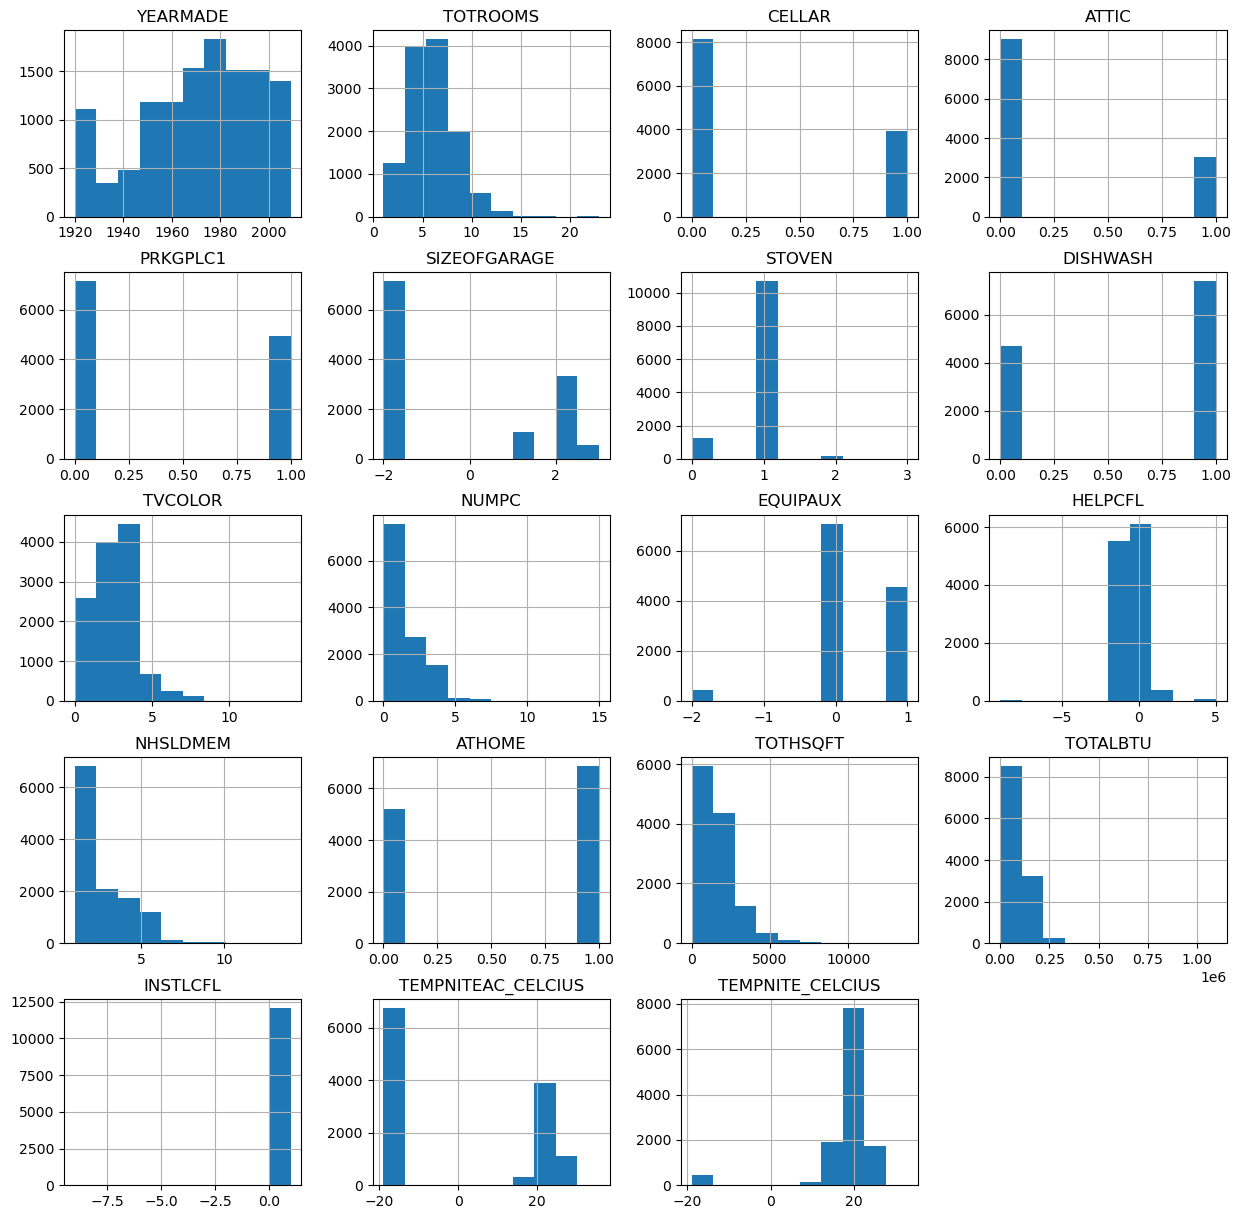

In [9]:
fig, ax = plt.subplots(figsize=(15, 15))
df.hist(ax=ax)

<AxesSubplot:>

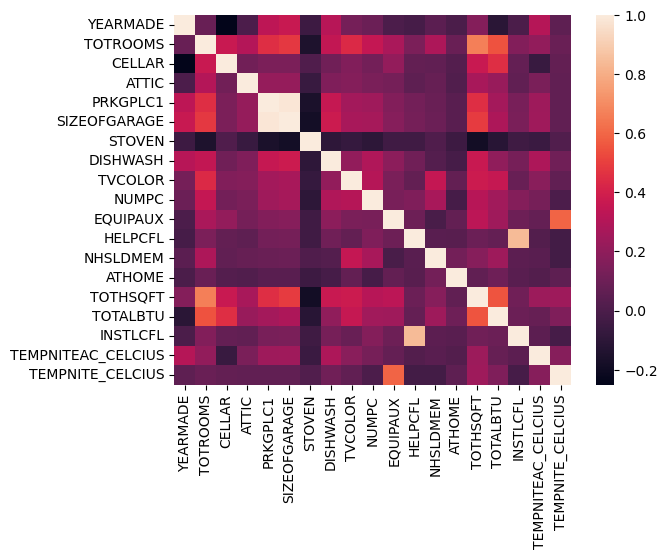

In [10]:
sns.heatmap(df.corr())

In [11]:
def check_missing_values(df: pd.DataFrame) -> bool:
    """Returns True if no values in the data frame are missing, otherwise returns False."""
    for col in df.columns:
        if df[col].isnull().sum() != 0:
            return False
    return True

assert check_missing_values(df)

# Linear Regression Model

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

y = df['TOTALBTU']
df.drop('TOTALBTU', axis=1, inplace=True)

scaler = MinMaxScaler()
scaler.fit(df)
X = scaler.transform(df)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [14]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = reg.predict(X_test)

In [16]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

In [17]:
mse

1478885741.1966805

In [20]:
y_test.describe()

count      2417.000000
mean      89158.571783
std       53062.192448
min          58.000000
25%       51835.000000
50%       78010.000000
75%      116539.000000
max      395515.000000
Name: TOTALBTU, dtype: float64

In [22]:
reg.score(X_test, y_test)

0.4745347975003117